# 1.1 Importing Dependancies to Project

In [654]:
import numpy as np 
import pandas as pd
import tensorflow as tf 
import os
import cv2
import matplotlib as mpl
from matplotlib import pyplot as plt
import random
import time

# 1.2 Accesing List Directoriees and Creating Path Data Frame

In [655]:
os.listdir()



imageID_Path = os.listdir('Impression_Expression')
imagePath_df = pd.DataFrame({'ID':[n.split('.')[0] for n in imageID_Path],
                                'Path':['Impression_Expression/' + n for n in imageID_Path]})

csv_dataPath = os.path.join('Impression_Expression','data.csv')
imageFeatures_df = pd.read_csv(csv_dataPath, sep=',')

# imageID[:}
# 

imagePath_df["ID"]= pd.to_numeric(imagePath_df["ID"],errors='coerce')

imagePath_df.reset_index(inplace=True)


for i,row in imagePath_df.iterrows():
    picture_Path = row['Path']
    # print(picture_Path)
    extCheck = len(picture_Path)
    path = picture_Path[extCheck-4:]
    if (path != 'JPEG'):
        imagePath_df.drop(i, inplace=True)


imagePath_df.drop(['index'], inplace=True, axis=1)

print(imagePath_df.head(),'\n')
# print(imageFeatures_df.head(), '\n')

print(len(imagePath_df))

# print(len(merged_df))

## Random Image 


     ID                           Path
0   0.0   Impression_Expression/0.JPEG
1   1.0   Impression_Expression/1.JPEG
2  10.0  Impression_Expression/10.JPEG
3  11.0  Impression_Expression/11.JPEG
4  12.0  Impression_Expression/12.JPEG 

87


# 1.3 - Merging CSV Data and File Paths According to ID

In [656]:
merged_df = pd.merge(left=imagePath_df, right=imageFeatures_df, on='ID', how='inner', )

# merged_df = merged_df.drop('Size'
# merged_df = merged_df.drop(['Medium', 'Size' ],  axis=1, )


print(merged_df.head())
# print(merged_df.tail())
print(len(merged_df))


     ID                           Path                  Artist  \
0   0.0   Impression_Expression/0.JPEG       Enslin Du Plessis   
1   1.0   Impression_Expression/1.JPEG  Jacob Hendrik Pierneef   
2  10.0  Impression_Expression/10.JPEG    Robert Gwelo Goodman   
3  11.0  Impression_Expression/11.JPEG          Tinus De Jongh   
4  12.0  Impression_Expression/12.JPEG      Gregoire Boonzaier   

   Low Estimation Price  High Estimation Price Hammer Price  \
0                 432.0                  648.0     Not Sold   
1               81000.0                97200.0     Not Sold   
2                2160.0                 3240.0       2052.0   
3                1620.0                 2700.0       1080.0   
4                2160.0                 3240.0     Not Sold   

                             Size                            Medium  
0    28.5cm-39cm(11.22in-15.35in)                 Oil on wood panel  
1       60cm-80cm(23.62in-31.5in)                     Oil on canvas  
2    29.5cm-37

# 1.3 Fixing Contents of Array and Dropping Unnecessary Data

In [657]:
## Validating the data

for i, row in merged_df.iterrows():
    if(merged_df.loc[i, 'Hammer Price'] == 'Not Sold'): 
        merged_df.loc[i, 'Hammer Price'] = 0.0
    
merged_df['Hammer Price'] = pd.to_numeric(merged_df['Hammer Price'], errors='coerce')




In [658]:
merged_df.drop(['Size', 'Medium'], inplace=True, axis=1)

In [659]:
means = []

for i, row in merged_df.iterrows():
    mean = (row['Low Estimation Price'] + row['High Estimation Price']) / 2
    means.append(mean)
    if(row['Hammer Price'] == 0.0): 
        merged_df.loc[i, 'Hammer Price'] = mean


# 
merged_df['Mean Estimation'] = pd.Series(means)

In [660]:
# print(merged_df.loc[:,"Mean Estimation"])
merged_df.head()


,ID,Path,Artist,Low Estimation Price,High Estimation Price,Hammer Price,Mean Estimation
0,0.0,Impression_Expression/0.JPEG,Enslin Du Plessis,432.0,648.0,540.0,540.0
1,1.0,Impression_Expression/1.JPEG,Jacob Hendrik Pierneef,81000.0,97200.0,89100.0,89100.0
2,10.0,Impression_Expression/10.JPEG,Robert Gwelo Goodman,2160.0,3240.0,2052.0,2700.0
3,11.0,Impression_Expression/11.JPEG,Tinus De Jongh,1620.0,2700.0,1080.0,2160.0
4,12.0,Impression_Expression/12.JPEG,Gregoire Boonzaier,2160.0,3240.0,2700.0,2700.0


In [661]:
# merged_df = merged_df.drop(["Size", "Medium" ],  axis=1)

merged_df

,ID,Path,Artist,Low Estimation Price,High Estimation Price,Hammer Price,Mean Estimation
0,0.0,Impression_Expression/0.JPEG,Enslin Du Plessis,432.0,648.0,540.0,540.0
1,1.0,Impression_Expression/1.JPEG,Jacob Hendrik Pierneef,81000.0,97200.0,89100.0,89100.0
2,10.0,Impression_Expression/10.JPEG,Robert Gwelo Goodman,2160.0,3240.0,2052.0,2700.0
3,11.0,Impression_Expression/11.JPEG,Tinus De Jongh,1620.0,2700.0,1080.0,2160.0
4,12.0,Impression_Expression/12.JPEG,Gregoire Boonzaier,2160.0,3240.0,2700.0,2700.0
...,...,...,...,...,...,...,...
82,83.0,Impression_Expression/83.JPEG,David Botha,2160.0,3240.0,2160.0,2700.0
83,84.0,Impression_Expression/84.JPEG,Walter Battiss,2160.0,3240.0,2700.0,2700.0
84,85.0,Impression_Expression/85.JPEG,Carl Becker,270.0,378.0,324.0,324.0
85,86.0,Impression_Expression/86.JPEG,Carl Becker,270.0,378.0,324.0,324.0


# 1.4 Creating Compressed files to hold data

In [662]:
# from sklearn.preprocessing import LabelEncoder

# merged_df['Artist'].unique()

# le = LabelEncoder()

# artistLE = le.fit_transform(merged_df['Artist'])
# artistLabels = le.classes_


# artistLabels = np.array(artistLabels).ravel()


# artistLabels.shape


# labelEncoer_df = pd.DataFrame(artistLE, columns = artistLabels)

# # oneHot_df.head()




In [663]:
##Creating List for Compressed Numpy array data paths
npz_paths = []

IMAGE_RESIZE = (256,256)
# merged_df = merged_df.reset_index(drop=True)

for i, row in merged_df.iterrows():

    ## ASsigning iamge path the picture path
    picture_Path = row['Path']

    ## Creating NPZ Path 
    npz_path = picture_Path.split('.')[0] + '.npz'
    npz_paths.append(npz_path)

    ## Loading Image from picture path
    pic_bgr_arr = cv2.imread(picture_Path)
    pic_rgb_arr = cv2.cvtColor(pic_bgr_arr, cv2.COLOR_BGR2RGB)
    pic_rgb_arr = cv2.resize(pic_rgb_arr, IMAGE_RESIZE)

    ## assigning Artist col
    artist = np.array(row['Artist']).astype(str)


    lowEst = np.array( row['Low Estimation Price']).astype(int)
    highEst = np.array( row['High Estimation Price']).astype(int)
    hmrPrc = np.array( row['Hammer Price']).astype(int)
    
    features = np.array([lowEst, highEst, hmrPrc]).astype(int)
   
    meanEst = np.array(row['Mean Estimation'] ).astype(int)
    
    np.savez_compressed(npz_path, pic=pic_rgb_arr, artist=artist, features=features, meanEst=meanEst)
    
merged_df['NPZ_Path'] = pd.Series(npz_paths)


    

print(merged_df.head())
# print(merged_df.tail())

     ID                           Path                  Artist  \
0   0.0   Impression_Expression/0.JPEG       Enslin Du Plessis   
1   1.0   Impression_Expression/1.JPEG  Jacob Hendrik Pierneef   
2  10.0  Impression_Expression/10.JPEG    Robert Gwelo Goodman   
3  11.0  Impression_Expression/11.JPEG          Tinus De Jongh   
4  12.0  Impression_Expression/12.JPEG      Gregoire Boonzaier   

   Low Estimation Price  High Estimation Price  Hammer Price  Mean Estimation  \
0                 432.0                  648.0         540.0            540.0   
1               81000.0                97200.0       89100.0          89100.0   
2                2160.0                 3240.0        2052.0           2700.0   
3                1620.0                 2700.0        1080.0           2160.0   
4                2160.0                 3240.0        2700.0           2700.0   

                       NPZ_Path  
0   Impression_Expression/0.npz  
1   Impression_Expression/1.npz  
2  Impression_

# Dont Really Need the NPZ Files, honeslt.y such was unless wanted data that does not include images

In [664]:
inputs_df = merged_df
inputs_df.head()

inputs_df.drop(['Path', "NPZ_Path"], inplace=True, axis=1)
# 

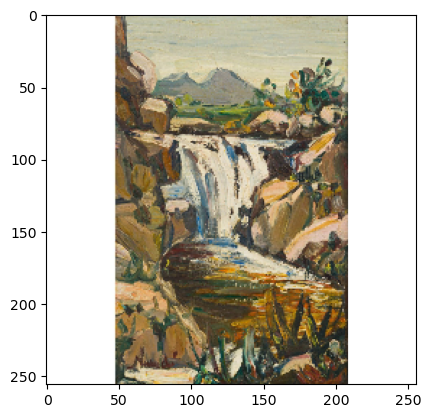

In [665]:
# loadNPZ = np.load('Impression_Expression/0.npz ')

# img = loadNPZ['pic']
# artistName = loadNPZ['artist']
# features = loadNPZ['features']


# print(features, loadNPZ['meanEst'])

# plt.imshow(img)


images = []
for i, row in inputs_df.iterrows():
    # Generate data with a range nthat varies from one plot to the next.
    currPath = row['ID']
    npz_loadPath = np.load('Impression_Expression/' + str(int(currPath)) + '.npz')
    images.append(npz_loadPath['pic'] * 1./ 255)
    plt.imshow(images[i])
    
inputs_df['Images'] = pd.Series(images)



In [666]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

# inputs_df.unique()


le = LabelEncoder()

inputs_df['Artist'] = le.fit_transform(inputs_df['Artist'])
# # artistLabels = np.array(artistLabels).ravel()


# artistLabels = ohe.categories_


In [667]:
inputs_df.head()



,ID,Artist,Low Estimation Price,High Estimation Price,Hammer Price,Mean Estimation,Images
0,0.0,18,432.0,648.0,540.0,540.0,"[[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,..."
1,1.0,29,81000.0,97200.0,89100.0,89100.0,"[[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,..."
2,10.0,40,2160.0,3240.0,2052.0,2700.0,"[[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,..."
3,11.0,43,1620.0,2700.0,1080.0,2160.0,"[[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,..."
4,12.0,26,2160.0,3240.0,2700.0,2700.0,"[[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,..."


In [668]:
#  oneHot_df = pd.DataFrame(artistOHE, columns = artistLabels)

#  oneHot_df.head()

In [670]:
def swap_columns(df, col1, col2):
    col_list = list(df.columns)
    x, y = col_list.index(col1), col_list.index(col2)
    col_list[y], col_list[x] = col_list[x], col_list[y]
    df = df[col_list]
    return df

inputs_df.head()


,ID,Artist,Low Estimation Price,High Estimation Price,Hammer Price,Mean Estimation,Images
0,0.0,18,432.0,648.0,540.0,540.0,"[[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,..."
1,1.0,29,81000.0,97200.0,89100.0,89100.0,"[[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,..."
2,10.0,40,2160.0,3240.0,2052.0,2700.0,"[[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,..."
3,11.0,43,1620.0,2700.0,1080.0,2160.0,"[[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,..."
4,12.0,26,2160.0,3240.0,2700.0,2700.0,"[[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,..."


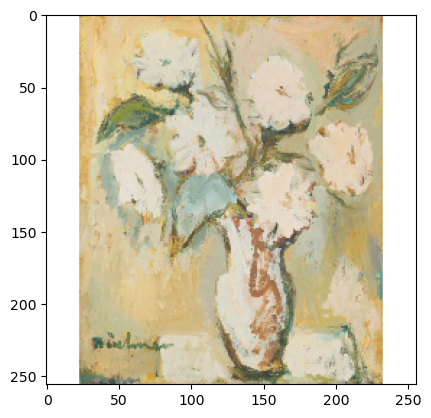

In [671]:
pic = random.randint(0, len(inputs_df))
picture = inputs_df.loc[pic, 'Images']
plt.imshow(picture)


#     plt.imshow(picture)

# 1.? - Normalize the data

In [672]:

maxLow = inputs_df['Low Estimation Price'].max()
lowStd = inputs_df['Low Estimation Price'].std()

maxHigh = inputs_df['High Estimation Price'].max()
highStd = inputs_df['High Estimation Price'].std()

maxEst = inputs_df['Mean Estimation'].max()
estStd = inputs_df['Mean Estimation'].std()

maxSale = inputs_df['Hammer Price'].max()
saleStd = inputs_df['Hammer Price'].std()

maxLow, lowStd, maxHigh, highStd, maxEst, estStd, maxSale, saleStd

(81000.0,
 8769.692331011012,
 97200.0,
 10696.703601983047,
 89100.0,
 9725.95337178707,
 89100.0,
 9600.474084960933)

# 2 - Normalizing data

In [673]:
for i in range(len(inputs_df)):
    inputs_df.loc[i, 'Low Estimation Price'] = inputs_df.at[i, 'Low Estimation Price'] / maxLow
    inputs_df.loc[i, 'High Estimation Price'] = inputs_df.at[i, 'High Estimation Price'] / maxHigh
    inputs_df.loc[i, 'Mean Estimation'] = inputs_df.at[i, 'Mean Estimation'] / maxEst
    inputs_df.loc[i, 'Hammer Price'] = inputs_df.at[i, 'Hammer Price'] / maxSale



In [688]:
# inputs_df.drop(["ID"],inplace=True, axis=1)
inputs_df.head()
    # npz_path = picture_Path.split('.')[0] + '.npz'
    # npz_paths.append(npz_path)

,Artist,Low Estimation Price,High Estimation Price,Hammer Price,Mean Estimation,Images
0,18,0.005333,0.006667,0.006061,0.006061,"[[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,..."
1,29,1.000000,1.000000,1.000000,1.000000,"[[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,..."
2,40,0.026667,0.033333,0.023030,0.030303,"[[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,..."
3,43,0.020000,0.027778,0.012121,0.024242,"[[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,..."
4,26,0.026667,0.033333,0.030303,0.030303,"[[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,..."


In [676]:
# swap_columns(inputs_df, 'One Hot', 'Mean Estimation')

In [ ]:
# inputs_df.drop(['Path', 'NPZ_Path'], inplace=True, axis=1)
# inputs_df

In [689]:
# print(features_df.tail())

inputs_df.reset_index(drop=True)

shuffled_df = inputs_df.sample(frac=1)

train_df, val_df, test_df = shuffled_df[:60], shuffled_df[60:80], shuffled_df[80:]

len(train_df), len(val_df), len(test_df)
# train_df["Artist"].dtypes

(60, 20, 7)

In [938]:
train_df.head()
# train_df = swap_columns(train_df, 'One Hot', 'Mean Estimation')
# val_df = swap_columns(val_df, 'One Hot', 'Mean Estimation')
# test_df = swap_columns(test_df, 'One Hot', 'Mean Estimation')

,Artist,Low Estimation Price,High Estimation Price,Hammer Price,Mean Estimation,Images
16,47,0.016667,0.019444,0.018182,0.018182,"[[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,..."
29,14,0.016667,0.019444,0.018182,0.018182,"[[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,..."
68,23,0.033333,0.038889,0.036364,0.036364,"[[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,..."
4,26,0.026667,0.033333,0.030303,0.030303,"[[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,..."
57,31,0.001000,0.001111,0.002545,0.001061,"[[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,..."


In [691]:
# example = train_df.to_numpy()

# newList = []



# x = example[0,:4]
# y  = example[1,:4]
# x

# # newList.append(x)
# # newList.append(y)

# # List = np.array(newList)

# # List.shape

# # example[0,4]

# # print(x)

# # example[0, :2] , example[0,4]
# # train_df.head()


array([47, 0.016666666666666666, 0.019444444444444445,
       0.01818181818181818], dtype=object)

# 3 - Loading in the Data

In [954]:



def get_X_y(df):

    dfArr = np.array(df)

    X_pic, X_features = [], []
    y = []

    for i in range(len(df)): 

        pic = dfArr[i, 5]
        X_pic.append(pic)

        features = dfArr[i,:4]
        X_features.append(features)

        # artit = df['Artist']
        # print(artit)

        # X_artist.append(artit)

        Estimate = dfArr[0,4]
        y.append(Estimate)

    X_pic, X_features = np.asarray(X_pic), np.asarray(X_features)
    y = np.asarray(y)

    return (X_pic, X_features), y



In [955]:
(X_train_pic, X_train_features), y_train = get_X_y(train_df)

(X_val_pic, X_val_features), y_val = get_X_y(val_df)

(X_test_pic, X_test_features), y_test = get_X_y(test_df)

In [956]:
X_train_pic.shape, X_train_features.shape, y_train.shape

((60, 256, 256, 3), (60, 4), (60,))

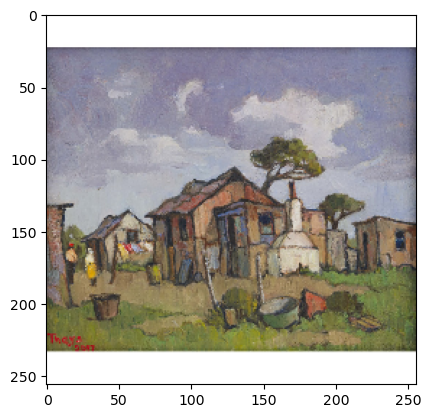

In [957]:
# train_df.dtypes

plt.imshow(X_train_pic[1])

# 4 - Model Architecture

In [958]:
# create the MLP and CNN models
# Keras: Multiple Inputs and Mixed Data
# import the necessary packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import concatenate
import numpy as np
import argparse
import locale
import os

In [959]:
def create_mlp(dim):
	# define our MLP network
	model = Sequential()
	model.add(Dense(8, input_dim=dim, activation="relu"))
	model.add(Dense(4, activation="relu"))
	# check to see if the regression node should be adde
	# return our model
	return model

def create_cnn(width, height, depth, filters=(16, 32, 64)):
    inputShape = (height, width, depth)
    chanDim = -1
    inputs = Input(shape=inputShape)

    for i, f in enumerate(filters):

        if(i == 0): 
            x = inputs

        x = Conv2D(f, (3,3), padding='same')(x)
        x = Activation('relu')(x)
        x = BatchNormalization(axis=chanDim)(x)
        x = MaxPooling2D(pool_size=(2,2))(x)

    x = Flatten()(x)
    x = Dense(16)(x)
    x = Activation("relu")(x)
    x = BatchNormalization(axis=chanDim)(x) 
    x = Dropout(0.5)(x)

    x = Dense(4)(x)
    x = Activation("relu")(x)

    model = Model(inputs, x)

    return model

In [980]:
# create the MLP and CNN models
mlp = create_mlp(X_train_features.shape[1])
cnn = create_cnn(256, 256, 3)
# create the input to our final set of layers as the *output* of both
# the MLP and CNN
combinedInput = concatenate([mlp.output, cnn.output])
# our final FC layer head will have two dense layers, the final one
# being our regression head
x = Dense(4, activation="relu")(combinedInput)
x = Dense(1, activation="linear")(x)
# our final model will accept categorical/numerical data on the MLP
# input and images on the CNN input, outputting a single value (the
# predicted price of the house)
model = Model(inputs=[mlp.input, cnn.input], outputs=x)

In [981]:
model.summary()

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_12 (Conv2D)             (None, 256, 256, 16  448         ['input_5[0][0]']                
                                )                                                                 
                                                                                                  
 activation_20 (Activation)     (None, 256, 256, 16  0           ['conv2d_12[0][0]']              
                                )                                                           

In [982]:
X_train_featuresTensor = tf.convert_to_tensor(X_train_features, dtype="float32")
X_train_picTensor = tf.convert_to_tensor(X_train_pic, dtype="float32")

y_trainTensor = tf.convert_to_tensor(y_train, dtype="float32")

X_val_featuresTensor = tf.convert_to_tensor(X_val_features, dtype="float32")
X_val_picTensor = tf.convert_to_tensor(X_val_pic, dtype="float32")

y_valTensor = tf.convert_to_tensor(y_val, dtype="float32")

X_test_featuresTensor = tf.convert_to_tensor(X_test_features, dtype="float32")
X_test_picTensor = tf.convert_to_tensor(X_test_pic, dtype="float32")

y_testTensor = tf.convert_to_tensor(y_test, dtype="float32")


In [994]:
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
# hist = model.fit(x=[X_train_featuresTensor, X_train_picTensor], epochs=20, validation_data=[X_val_featuresTensor, X_val_picTensor], callbacks=[tensorboard_callback])

Epoch 1/20


ValueError: in user code:

    File "c:\Users\Tober\anaconda3\lib\site-packages\keras\engine\training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\Tober\anaconda3\lib\site-packages\keras\engine\training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\Tober\anaconda3\lib\site-packages\keras\engine\training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\Tober\anaconda3\lib\site-packages\keras\engine\training.py", line 1025, in train_step
        self._validate_target_and_loss(y, loss)
    File "c:\Users\Tober\anaconda3\lib\site-packages\keras\engine\training.py", line 979, in _validate_target_and_loss
        raise ValueError(

    ValueError: Target data is missing. Your model was compiled with loss=mean_absolute_percentage_error, and therefore expects target data to be provided in `fit()`.


In [995]:
# compile the model using mean absolute percentage error as our loss,
# implying that we seek to minimize the absolute percentage difference
# between our price *predictions* and the *actual prices*
opt = Adam(learning_rate=1e-3)
model.compile( loss="mean_absolute_percentage_error", optimizer=opt, metrics=['accuracy'])
# train the model
print("[INFO] training model...")
hist = model.fit(
	x=[X_train_featuresTensor, X_train_picTensor], y=y_trainTensor,
	validation_data=([X_val_featuresTensor, X_val_picTensor], y_valTensor),
	epochs=20, batch_size=4)
# make predictions on the testing data
print("[INFO] predicting house prices...")
preds = model.predict([X_test_featuresTensor, X_test_picTensor])

[INFO] training model...
Epoch 1/20
15/15 [==============================] - 4s 172ms/step - loss: 1746.9598 - accuracy: 0.0000e+00 - val_loss: 2549.5872 - val_accuracy: 0.0000e+00
Epoch 2/20
15/15 [==============================] - 2s 140ms/step - loss: 1226.1823 - accuracy: 0.0000e+00 - val_loss: 9903.1631 - val_accuracy: 0.0000e+00
Epoch 3/20
15/15 [==============================] - 2s 141ms/step - loss: 1135.3209 - accuracy: 0.0000e+00 - val_loss: 6827.1030 - val_accuracy: 0.0000e+00
Epoch 4/20
15/15 [==============================] - 2s 140ms/step - loss: 1121.7866 - accuracy: 0.0000e+00 - val_loss: 5867.1470 - val_accuracy: 0.0000e+00
Epoch 5/20
15/15 [==============================] - 2s 132ms/step - loss: 861.1571 - accuracy: 0.0000e+00 - val_loss: 7568.3760 - val_accuracy: 0.0000e+00
Epoch 6/20
15/15 [==============================] - 2s 128ms/step - loss: 982.1246 - accuracy: 0.0000e+00 - val_loss: 15111.7158 - val_accuracy: 0.0000e+00
Epoch 7/20
15/15 [======================

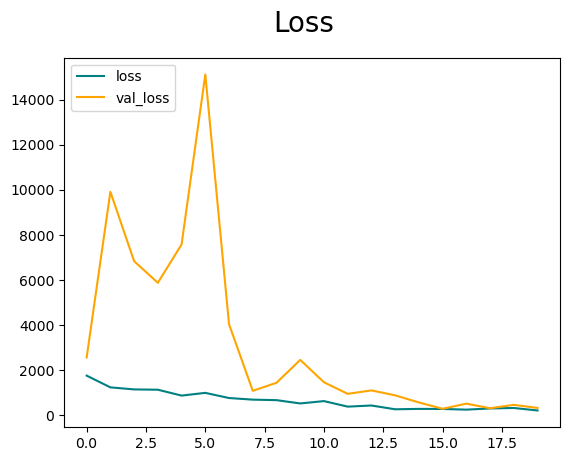

In [996]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

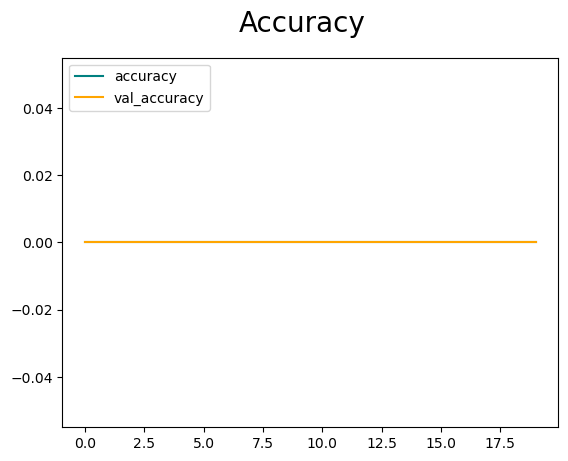

In [997]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

In [988]:
for i in range(len(preds)): 
    pred = preds[i]*maxEst
    print("Prediction: ", pred)

y_test

Prediction:  [472.96722]
Prediction:  [1000.68823]
Prediction:  [-368.72668]
Prediction:  [4370.483]
Prediction:  [1946.877]
Prediction:  [1841.4049]
Prediction:  [5707.2866]


array([0.03030303, 0.03030303, 0.03030303, 0.03030303, 0.03030303,
       0.03030303, 0.03030303])